***************************************************************************************************************
*** Dataframe *************************************************************************************************
Index(['target', 'target_str', 'dataframe_index', 'patient_id', 'session_id',
       'c3d_id', 'trial_id', 'cycle_id', 'signal', 'signal_channel_names'],
      dtype='object')
   target                 target_str  dataframe_index  patient_id  session_id  \
0     3.0  Type D - Apparent Equinus                0         366        1224   
1     3.0  Type D - Apparent Equinus                1         366        1224   
2     3.0  Type D - Apparent Equinus                2         366        1224   
3     3.0  Type D - Apparent Equinus                3         366        1224   
4     3.0  Type D - Apparent Equinus                4         366        1224   

    c3d_id trial_id cycle_id  \
0  [15483]  [15483]      [5]   
1  [15483]  [15483]      [6]   
2  [15483]  [1548

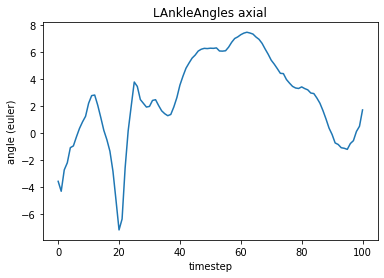

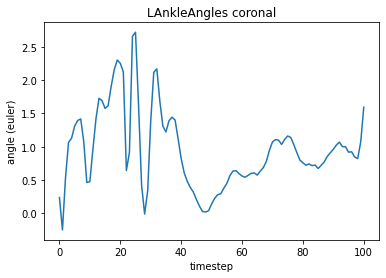

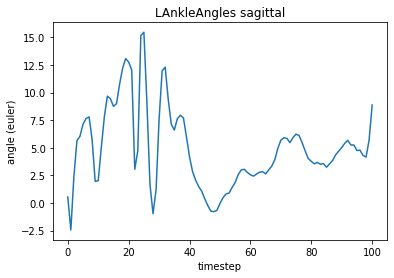

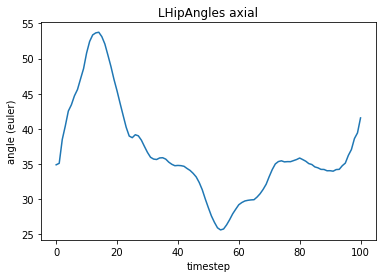

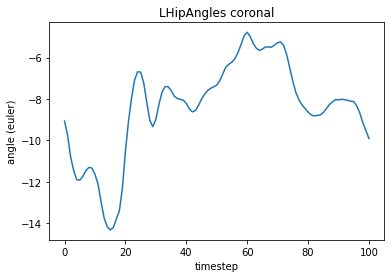

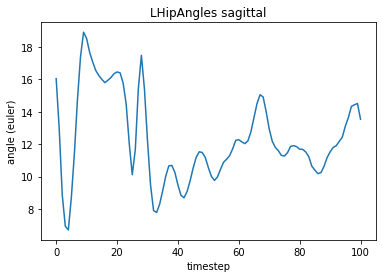

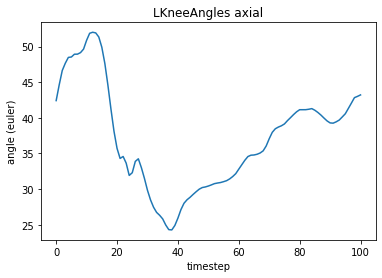

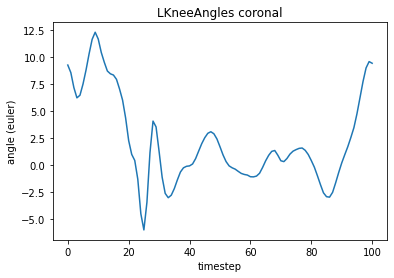

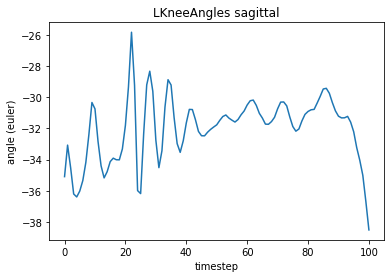

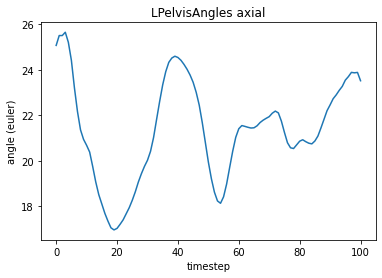

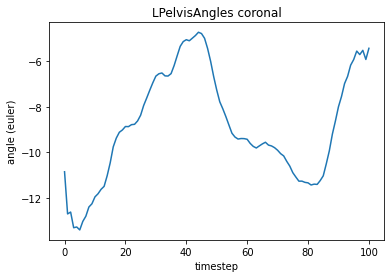

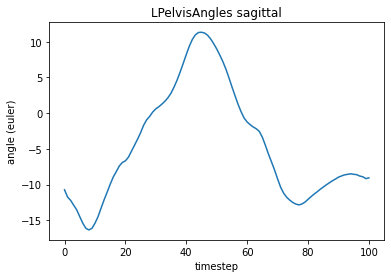

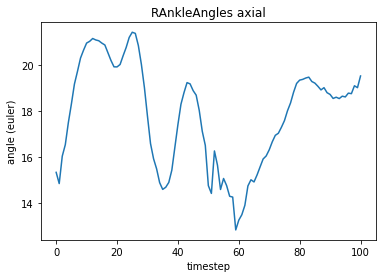

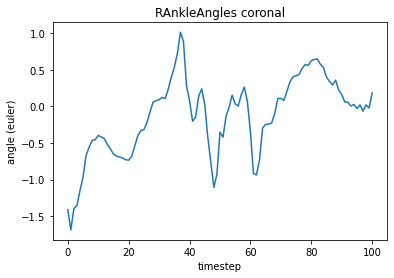

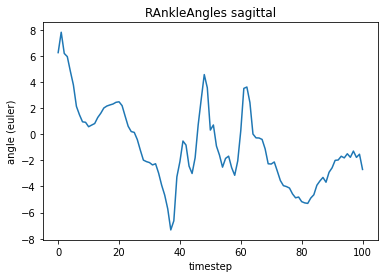

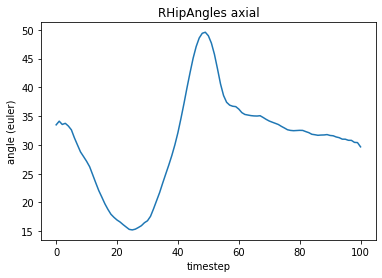

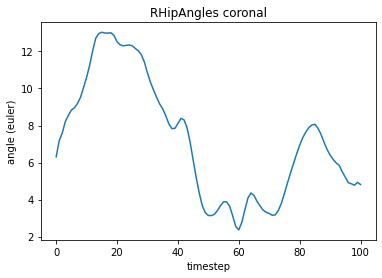

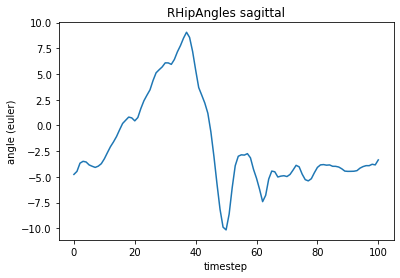

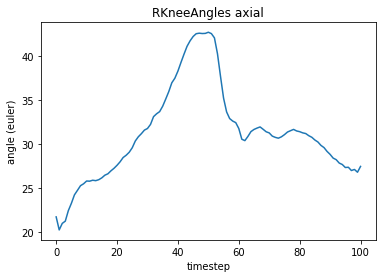

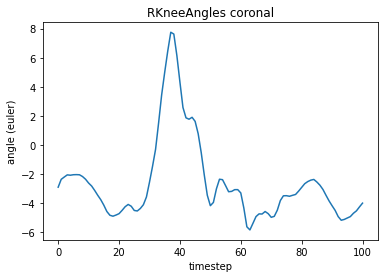

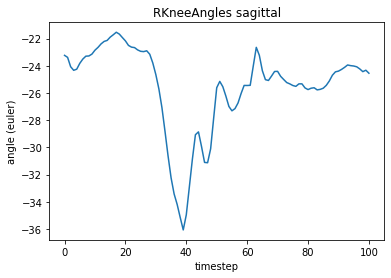

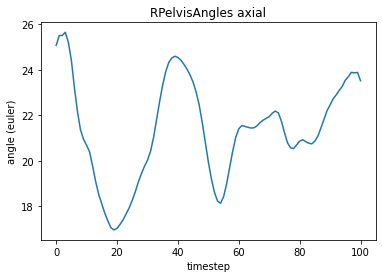

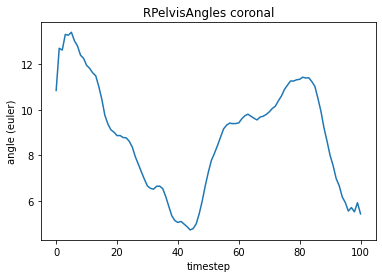

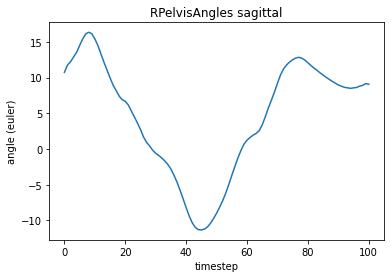

In [4]:
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


pickle_file_path: str = "/home/jacobo/Desktop/ML/Dataset/DataframeExport.pickle"
my_df = pd.read_pickle(pickle_file_path)

print("***************************************************************************************************************")
print("*** Dataframe *************************************************************************************************")
pprint(my_df.keys())
print(my_df.head())
print("")

""" Saving to dataframe converted the numpy arrays to strings, so we need to convert from string to numpy array"""
signal: np.ndarray = my_df["signal"][0]
channel_names: str = my_df["signal_channel_names"][0]

print("***************************************************************************************************************")
print("*** Signal ****************************************************************************************************")
print("Shape :\n", signal.shape)
print("Min   :\n", signal.min(axis=1))
print("Max   :\n", signal.max(axis=1))
print("Mean  :\n", signal.mean(axis=1))
print("Median:\n", np.median(signal, axis=1))
print("STD   :\n", signal.std(axis=1))


for channel_signal, channel_name in zip(signal, channel_names):
    plt.plot(channel_signal)
    plt.title(channel_name)
    plt.ylabel("angle (euler)")
    plt.xlabel("timestep")
    plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of features
num_channels = 24
num_features = 101

# Create an array to store the training data
num_samples_per_class = 100  # One sample per class
training_data = np.zeros((num_samples_per_class * 3, num_channels, num_features))

# Create three distinct patterns for each class with unique randomness
np.random.seed(0)  # Set a global seed for reproducibility
pattern1 = (2 * np.random.rand(num_samples_per_class, num_channels, num_features)) - 1

np.random.seed(1)  # Set a unique seed for the first class
pattern2 = (2 * np.random.rand(num_samples_per_class, num_channels, num_features)) - 1

np.random.seed(2)  # Set a unique seed for the second class
pattern3 = (2 * np.random.rand(num_samples_per_class, num_channels, num_features)) - 1

# Assign each pattern to a class
training_data[:num_samples_per_class] = pattern1
training_data[num_samples_per_class:2*num_samples_per_class] = pattern2
training_data[2*num_samples_per_class:] = pattern3

# You can also assign labels to each class
labels = np.array([0] * num_samples_per_class + [1] * num_samples_per_class + [2] * num_samples_per_class)

print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [2]:
training_data.shape

(300, 24, 101)

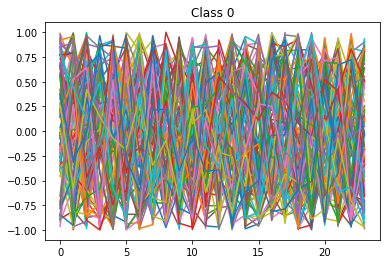

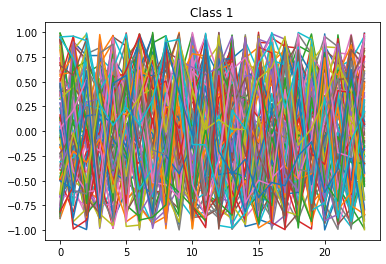

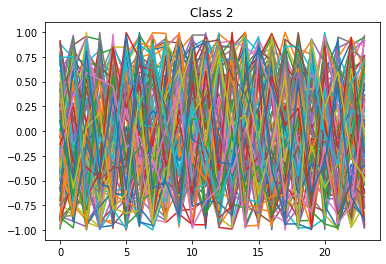

In [3]:
# Visualize one sample from each class
for class_label in range(3):
    sample_idx = np.where(labels == class_label)[0][3]
    sample = training_data[sample_idx]
    
    plt.figure()
    plt.plot(sample)
    plt.title(f"Class {class_label}")
    plt.show()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have the 'training_data' and 'labels' from the previous code

# Convert NumPy arrays to PyTorch tensors
data = torch.FloatTensor(training_data)
labels = torch.LongTensor(labels)

# Create a TensorDataset
dataset = TensorDataset(data, labels)

# Split the dataset into a training and testing set
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create data loaders
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


/home/jacobo/anaconda3/envs/wav2vec/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
class GroupNormConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride, groups=groups)
        self.activation = nn.GELU()
        self.layer_norm = nn.GroupNorm(num_groups=out_channels, num_channels=out_channels, eps=1e-05, affine=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.activation(x)
        x = self.layer_norm(x)
        return x

In [8]:
class NoLayerNormConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, groups=1):
        super().__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride, groups=groups)
        self.activation = nn.GELU()

    def forward(self, x):
        x = self.conv(x)
        x = self.activation(x)
        return x

In [58]:
class FeatureExtractor(nn.Module):
    def __init__(self, in_channels, hidden_size=768):
        super().__init__()

        out_channels  = int((hidden_size)*in_channels)

        self.conv_layers = nn.ModuleList([
            GroupNormConvLayer(in_channels, out_channels, 3, 1, groups=in_channels),
            NoLayerNormConvLayer(out_channels, out_channels, 3, 1, groups=in_channels),
            NoLayerNormConvLayer(out_channels, out_channels, 3, 2, groups=in_channels),
            NoLayerNormConvLayer(out_channels, out_channels, 3, 2, groups=in_channels),
            NoLayerNormConvLayer(out_channels, out_channels, 3, 2, groups=in_channels),
            NoLayerNormConvLayer(out_channels, out_channels, 2, 2, groups=in_channels),
            NoLayerNormConvLayer(out_channels, out_channels, 2, 2, groups=in_channels)
        ])

    def forward(self, x):
        for layer in self.conv_layers:
            x = layer(x)
            print(x.shape)
        return x

In [59]:
class FeatureProjection(nn.Module):
    def __init__(self, in_channels, hidden_size=768):
        super().__init__()

        in_channels = in_channels
        out_channels  = int((hidden_size/2)*in_channels)

        self.layer_norm = nn.LayerNorm(out_channels, eps=1e-05)
        self.projection = nn.Linear(out_channels, hidden_size)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.layer_norm(x)
        x = self.projection(x)
        x = self.dropout(x)
        return x

In [60]:
class Classification_1DCNN(nn.Module):
    def __init__(self, in_channels=100, num_classes=100, hidden_size=768):
        super().__init__()

        self.in_channels = in_channels
        self.num_classes = num_classes

        self.feature_extractor = FeatureExtractor(in_channels)
        #self.feature_projection = FeatureProjection(in_channels)
        
        self.classifier = nn.Linear(hidden_size, self.num_classes)
        
    def merged_strategy(self, hidden_states, mode="mean"):
        if mode == "mean":
            outputs = torch.mean(hidden_states, dim=1)
        elif mode == "sum":
            outputs = torch.sum(hidden_states, dim=1)
        elif mode == "max":
            outputs = torch.max(hidden_states, dim=1)[0]
        else:
            raise Exception(
                "The pooling method hasn't been defined! Your pooling mode must be one of these ['mean', 'sum', 'max']")
        return outputs

    def forward(self, inputs, labels=None, **kwargs):
        print("="*10)
        print(inputs.shape)
        #torch.Size([5, 660000])
        
        x = inputs #.unsqueeze(1)
        print(x.shape)
        #torch.Size([5, 1, 660000])
        
        x = self.feature_extractor(x)
        print(x.shape)
        #torch.Size([5, 512, 2062])
        
        x = x.transpose(1, 2)
        print(x.shape)
        #torch.Size([5, 2062, 512])
        
        #x = self.feature_projection(x)
        #print(x.shape)
        #torch.Size([5, 2062, 768])
        
        x = self.merged_strategy(x, mode="mean")
        print(merged_features_proj.shape)
        #torch.Size([5, 768])
        
        logits = self.classifier(x)
        print(logits.shape)
        #torch.Size([5, 10])

        if labels is not None:
            # if batch size = 9
            #print("I am in the loss")
            #print(labels.view(-1))
            #print(logits.view(-1, self.num_classes).shape)
            #loss_fct = BCEWithLogitsLoss()
            #loss =  loss_fct(logits.squeeze(), labels.float())#
            loss_fct = CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_classes), labels.view(-1)) #loss_fct(logits, labels) #
            #print(loss)
            return loss 
        else:
            return logits

In [61]:
model = Classification_1DCNN(in_channels=24, num_classes=3)

In [62]:
model

Classification_1DCNN(
  (feature_extractor): FeatureExtractor(
    (conv_layers): ModuleList(
      (0): GroupNormConvLayer(
        (conv): Conv1d(24, 18432, kernel_size=(3,), stride=(1,), groups=24)
        (activation): GELU()
        (layer_norm): GroupNorm(18432, 18432, eps=1e-05, affine=True)
      )
      (1): NoLayerNormConvLayer(
        (conv): Conv1d(18432, 18432, kernel_size=(3,), stride=(1,), groups=24)
        (activation): GELU()
      )
      (2): NoLayerNormConvLayer(
        (conv): Conv1d(18432, 18432, kernel_size=(3,), stride=(2,), groups=24)
        (activation): GELU()
      )
      (3): NoLayerNormConvLayer(
        (conv): Conv1d(18432, 18432, kernel_size=(3,), stride=(2,), groups=24)
        (activation): GELU()
      )
      (4): NoLayerNormConvLayer(
        (conv): Conv1d(18432, 18432, kernel_size=(3,), stride=(2,), groups=24)
        (activation): GELU()
      )
      (5): NoLayerNormConvLayer(
        (conv): Conv1d(18432, 18432, kernel_size=(2,), stride=(

In [63]:
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Stochastic Gradient Descent optimizer

In [64]:
# Set the number of training epochs
num_epochs = 10

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}] Loss: {loss:.4f}')

print('Training complete.')


torch.Size([4, 24, 101])
torch.Size([4, 24, 101])
torch.Size([4, 18432, 99])
torch.Size([4, 18432, 97])
torch.Size([4, 18432, 48])
torch.Size([4, 18432, 23])
torch.Size([4, 18432, 11])
torch.Size([4, 18432, 5])
torch.Size([4, 18432, 2])
torch.Size([4, 18432, 2])
torch.Size([4, 2, 18432])


NameError: name 'merged_features_proj' is not defined